In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="whitegrid", color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline 

import scipy.stats as stats

import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin

# import cufflinks
# cufflinks.go_offline()

In [2]:
car = pd.read_csv("train.csv")
car = pd.DataFrame(car)
car.head(3)
# car.iloc[0]

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,0,0,0,1,0,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,0,1,0,0,0,1,0,0,0,0
2,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,0,1,0,1,0,0,0,0


# I. column Id,model,Price 변수 확인


In [3]:
car_y = car.iloc[:, :3]
car_x = car.iloc[:, 3:]
# car_y
# car_x
print(len(car_y.columns), len(car_x.columns))

(3, 36)


In [4]:
var_real = ['Mfg_Month', 'Mfg_Year', 'HP', 'CC', 'Quarterly_Tax', 'Weight',
           'Guarantee_Period', 'KM','Age_08_04']
var_cat = ['Color','Fuel_Type', 'Met_Color', 'Automatic', 'ABS', 'Airbag_1',
          'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
          'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model',
          'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Doors',
          'Tow_Bar','Cylinders','Gears','Mfr_Guarantee','BOVAG_Guarantee',]

print len(var_real), len(var_cat)

9 27


#### column 양적/질적 나누기

In [5]:
car_x_real = car[var_real]
car_x_cat = car[var_cat]

# car_x_real.head(3)
# car_x_cat.head(3)
print len(car_x_real.columns), len(car_x_cat.columns)

9 27


In [6]:
car2 = pd.concat([car_x_real, car_x_cat], axis = 1)

car2.head(3)

,Mfg_Month,Mfg_Year,HP,CC,Quarterly_Tax,Weight,Guarantee_Period,KM,Age_08_04,Color,...,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Doors,Tow_Bar,Cylinders,Gears,Mfr_Guarantee,BOVAG_Guarantee
0,10,2002,90,2000,210,1165,3,46986,23,Blue,...,1,0,0,0,3,0,4,5,0,1
1,10,2002,90,2000,210,1165,3,72937,23,Silver,...,1,0,0,0,3,0,4,5,0,1
2,3,2002,90,2000,210,1170,3,38500,30,Black,...,1,0,0,0,3,0,4,5,1,1


In [7]:
#with plt.style.context(('seaborn-white')):
#    sns_plot = sns.pairplot(pd.concat([car_x[var_cat[0]],car_x[var_real[:5]]], axis=1) ,size=4.)
    
#plt.show()

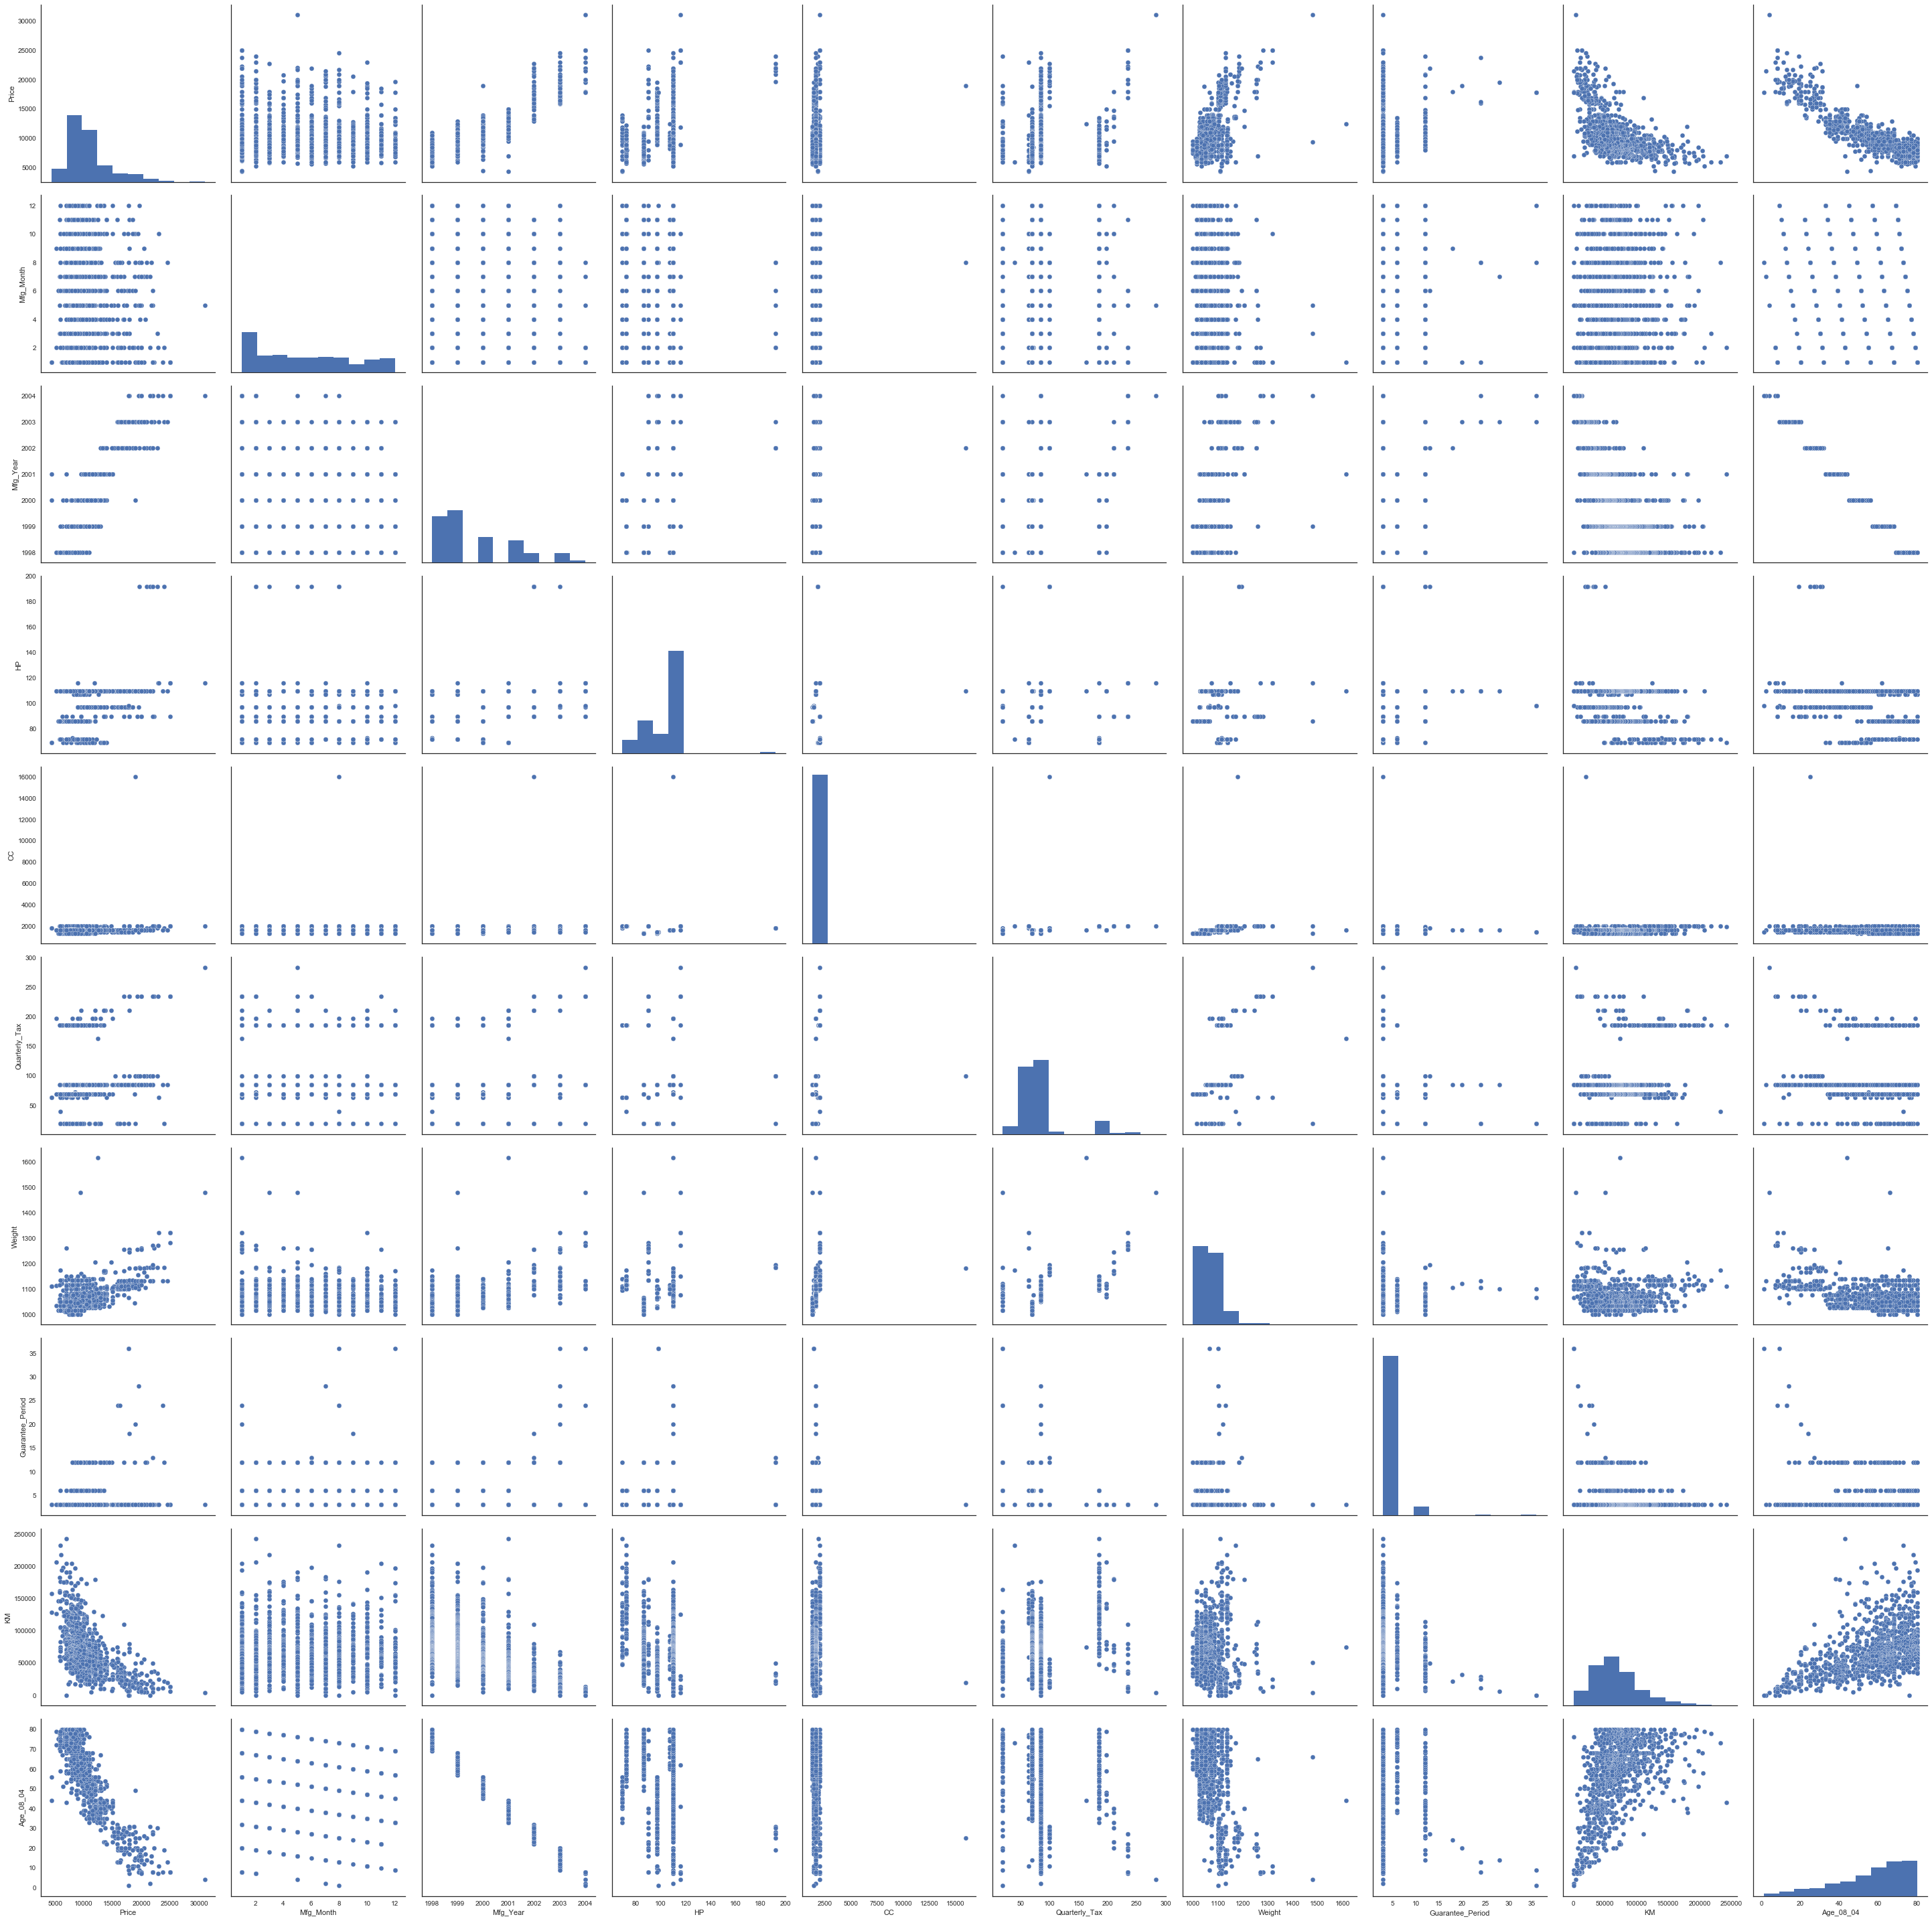

In [8]:
with plt.style.context(('seaborn-white')):
     sns_plot = sns.pairplot(pd.concat([car[['Price']],car[var_real[:]]], axis=1) ,size=4.)
    
plt.show()



In [9]:
def display_boxplot(feature):
    with plt.style.context(('seaborn-white')):
        sns.boxplot(x= car[feature], y=car['Price'], linewidth=2, palette="Set1")


In [10]:
def display_multi_boxplots(start_feature_name, row, col):
    with plt.style.context(('seaborn-white')):
        f, axes = plt.subplots(row, col, figsize=(2.3*col, 3.5*row), sharey=True)

        nums = row*col
        start_idx = var_cat.index(start_feature_name)

        for num, ax in zip(range(nums), axes.flat):
            try:
                sns.boxplot(x=car[var_cat[start_idx + num]], y=car['Price'], palette="Set3", ax=ax)
            except:
                pass


# II. 전처리

(1). NaN값 없는지 확인


In [11]:
car.count()

Id                   1019
Model                1019
Price                1019
Age_08_04            1019
Mfg_Month            1019
Mfg_Year             1019
KM                   1019
Fuel_Type            1019
HP                   1019
Met_Color            1019
Color                1019
Automatic            1019
CC                   1019
Doors                1019
Cylinders            1019
Gears                1019
Quarterly_Tax        1019
Weight               1019
Mfr_Guarantee        1019
BOVAG_Guarantee      1019
Guarantee_Period     1019
ABS                  1019
Airbag_1             1019
Airbag_2             1019
Airco                1019
Automatic_airco      1019
Boardcomputer        1019
CD_Player            1019
Central_Lock         1019
Powered_Windows      1019
Power_Steering       1019
Radio                1019
Mistlamps            1019
Sport_Model          1019
Backseat_Divider     1019
Metallic_Rim         1019
Radio_cassette       1019
Parking_Assistant    1019
Tow_Bar     

 (2). 아웃라이어(Price) 확인 

In [12]:
def display_boxplot2(feature):
    with plt.style.context(('seaborn-white')):
        sns.boxplot(y = car[feature], linewidth=2, palette="Set1")

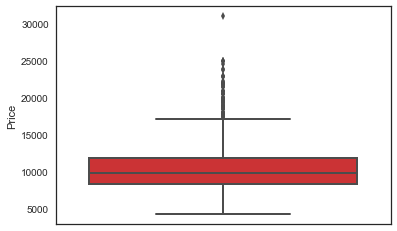

In [13]:
display_boxplot2('Price')


plt.show()

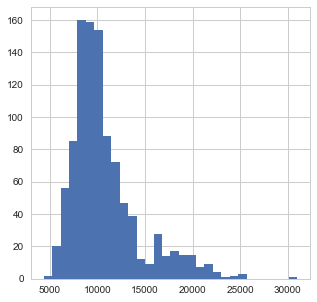

In [14]:
car['Price'].hist(bins=30, figsize=(5,5))
plt.show()

In [15]:
car['Price'].describe()

count     1019.000000
mean     10738.358194
std       3614.987568
min       4350.000000
25%       8400.000000
50%       9850.000000
75%      11950.000000
max      31000.000000
Name: Price, dtype: float64

(3). Price의 사분위범위 및 아웃라이어 기준범위 확인

In [16]:
Q1 = 8400.0
Q3 = 11950.0
IQR = Q3 - Q1
outlier_standard_p = Q3 + (IQR * 1.5)
outlier_standard_m = Q1 - (IQR * 1.5)
# Price 아웃라이어는 Q3 + outlier_standard 이상 이거나, Q1 - outlier_standard 

In [17]:
car[car['Price'] >= outlier_standard_p]
# outlier 78개. 모두 조정하기에는 많고 없앨 논리가 없음. 따라서 31000 값만 조정

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
3,11,TOYOTA Corolla 1.8 VVTL-i T-Sport 3-Drs 2/3-Doors,20950,25,8,2002,31461,Petrol,192,0,...,1,1,0,0,0,0,1,0,0,0
4,13,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,19600,25,8,2002,32189,Petrol,192,0,...,1,1,0,1,1,1,1,0,0,0
5,14,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,21500,31,2,2002,23000,Petrol,192,1,...,1,1,0,1,1,1,1,0,0,0
6,16,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...,22000,28,5,2002,18739,Petrol,192,0,...,1,1,0,1,1,1,1,0,0,0
7,17,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-...,22750,30,3,2002,34000,Petrol,192,1,...,1,1,0,1,0,1,1,0,0,0
8,18,TOYOTA Corolla 1.6 VVTI Linea Terra Comfort 2...,17950,24,9,2002,21716,Petrol,110,1,...,1,1,1,0,0,0,0,1,0,1
15,27,TOYOTA Corolla 1.6 16V VVT I 3DR SOL 2/3-Doors,17495,27,6,2002,34545,Petrol,110,1,...,1,1,0,1,0,1,1,0,0,0
17,30,TOYOTA Corolla 1.6 16V VVT I 3DR SOL 2/3-Doors,17950,30,3,2002,11090,Petrol,110,1,...,1,1,0,1,1,1,0,0,0,0
29,47,TOYOTA Corolla 2.0 D4D 90 5DR TERRA 4/5-Doors,17950,27,6,2002,79375,Diesel,90,1,...,1,1,0,0,1,1,0,0,0,0
31,49,TOYOTA Corolla 2.0 D4D 90 5DR TERRA COMFORT 4...,17950,22,11,2002,72215,Diesel,90,1,...,1,1,0,0,1,1,0,0,0,0


(4).양적변수의 레버리지 확인
- 궁금한점 : 레버리지가 회귀분석에 미치는 영향

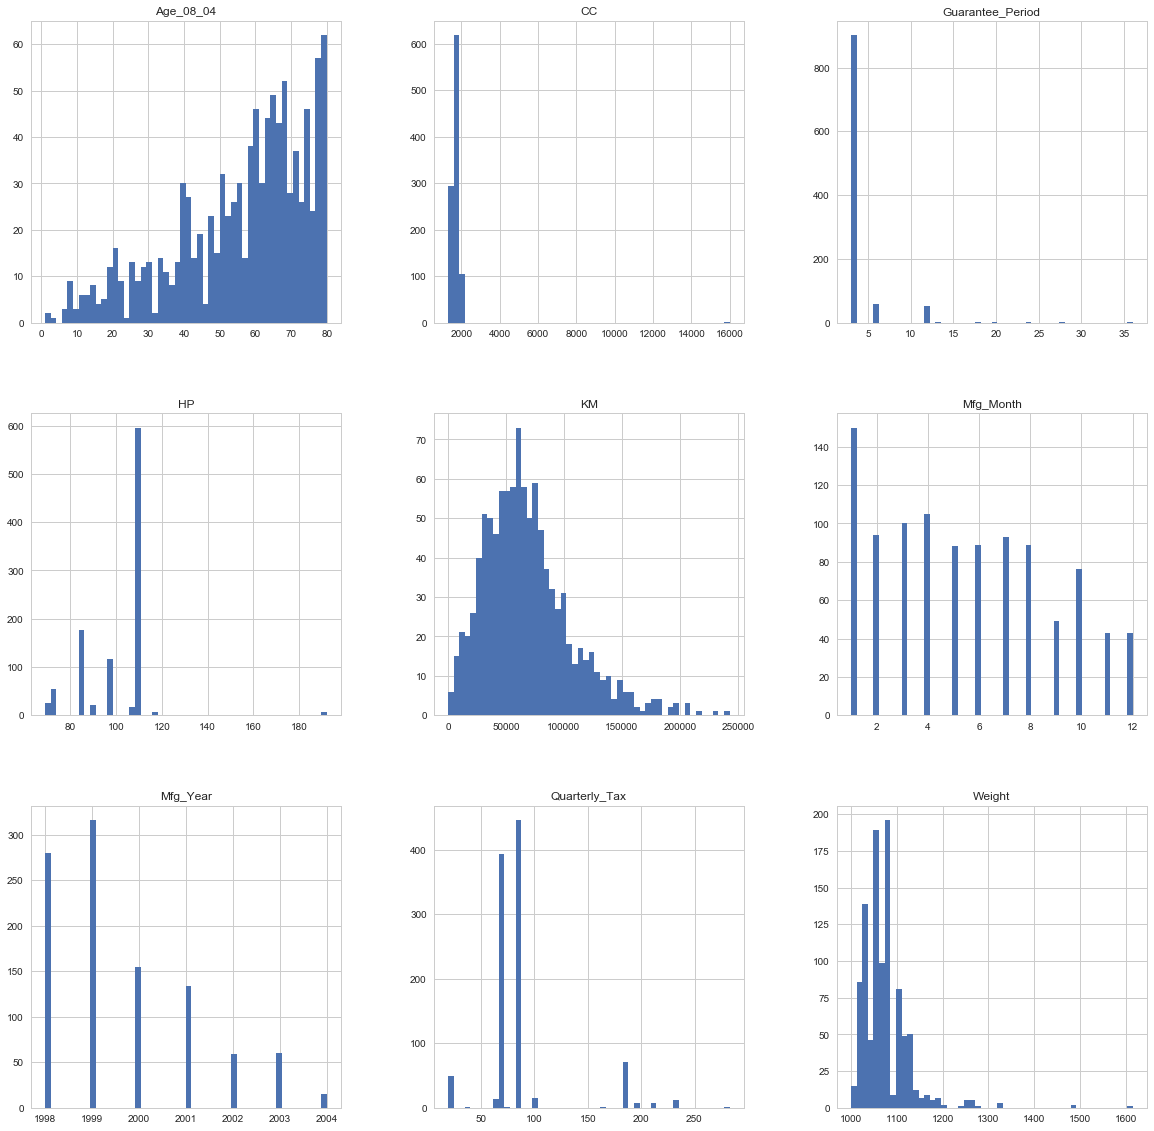

In [18]:
car_x_real.hist(bins=50, figsize=(20,20))
plt.show()

In [19]:
# 레버리지
# HP 180 이상, Weight 1400 이상, CC 16000

(5). 영향치(influence) 
- 아웃라이어 레버리지 모두 클 경우는 놔둔다?
- CC 16000과 KM 50이하는 입력오류라고 판단
- 아웃라이어 레버리지 고려하여 선형관계에 없으면 조정?

### 결국 입력 오류라고 판단되는 것들만 조정

In [20]:
# car.iloc[77]

In [21]:
# car[car['HP'] >= 180]
# HP 180 이상 7개

In [22]:
# car[car['Weight'] >= 1400]
# Weight 1400 이상 3개

In [23]:
car[car['CC'] >= 15000]

# CC 15000이상 1개

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
54,81,TOYOTA Corolla 1.6 5drs 1 4/5-Doors,18950,25,8,2002,20019,Petrol,110,1,...,1,1,0,0,0,0,0,0,0,0


In [24]:
car[car['KM']<= 100 ]

# KM 100이하 5개

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
83,119,TOYOTA Corolla 1.6 16V VVT I 3DR TERRA COMFORT...,17900,7,2,2004,1,Petrol,110,1,...,1,1,0,0,1,1,0,0,0,0
125,171,TOYOTA Corolla 1.4-16v VVT-i Linea Terra Comfo...,17795,9,12,2003,1,Petrol,98,1,...,1,1,0,0,0,0,0,0,0,0
132,185,TOYOTA Corolla 1.6 16V VVT I 5DR SOL 4/5-Doors,21500,2,7,2004,15,Petrol,110,1,...,1,1,0,1,1,1,0,0,0,0
133,186,TOYOTA Corolla 1.4-16v VVT-i Linea Terra Comf...,17795,1,8,2004,1,Petrol,98,1,...,1,1,0,0,0,0,0,0,0,0
1018,1442,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,6950,76,5,1998,1,Petrol,110,0,...,0,1,0,0,0,0,0,0,0,0


#### 아웃라이어 조정 : Price의 median

In [25]:
price_median = car['Price'].median()
price_median

9850.0

In [26]:
car['Price'][77] = price_median # 이용?

c:\python27\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


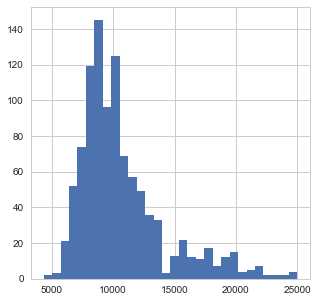

In [27]:
car['Price'].hist(bins=30, figsize=(5,5))
plt.show()

In [28]:
car[car['Price']==31000]

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar


In [29]:
KM_median = car['KM'].median()
car['KM'][83] = KM_median
car['KM'][125] = KM_median
car['KM'][132] = KM_median
car['KM'][133] = KM_median
car['KM'][1018] = KM_median



c:\python27\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\python27\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\python27\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\python27\lib\site-packages\ipykernel_launcher.py:5: SettingWithCo

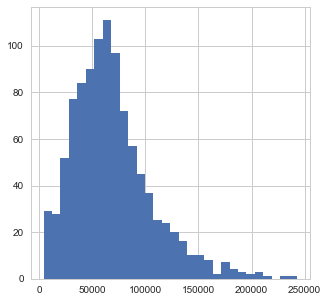

In [30]:
car['KM'].hist(bins=30, figsize=(5,5))
plt.show()

In [31]:
CC_median = car['CC'].median()
car['CC'][54] = CC_median

c:\python27\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


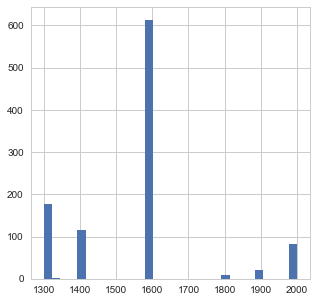

In [32]:
car['CC'].hist(bins=30, figsize=(5,5))
plt.show()

# II. 양적변수 확인

'Mfg_Month',  'Mfg_Year',  'HP',  'CC',  'Quarterly_Tax',  'Weight',
 Guarantee_Period',  'KM',  'Age_08_04'

In [33]:
real_list = ['Mfg_Month', 'Mfg_Year', 'HP', 'Quarterly_Tax', 'Weight', 'Guarantee_Period', 'KM', 'Age_08_04']

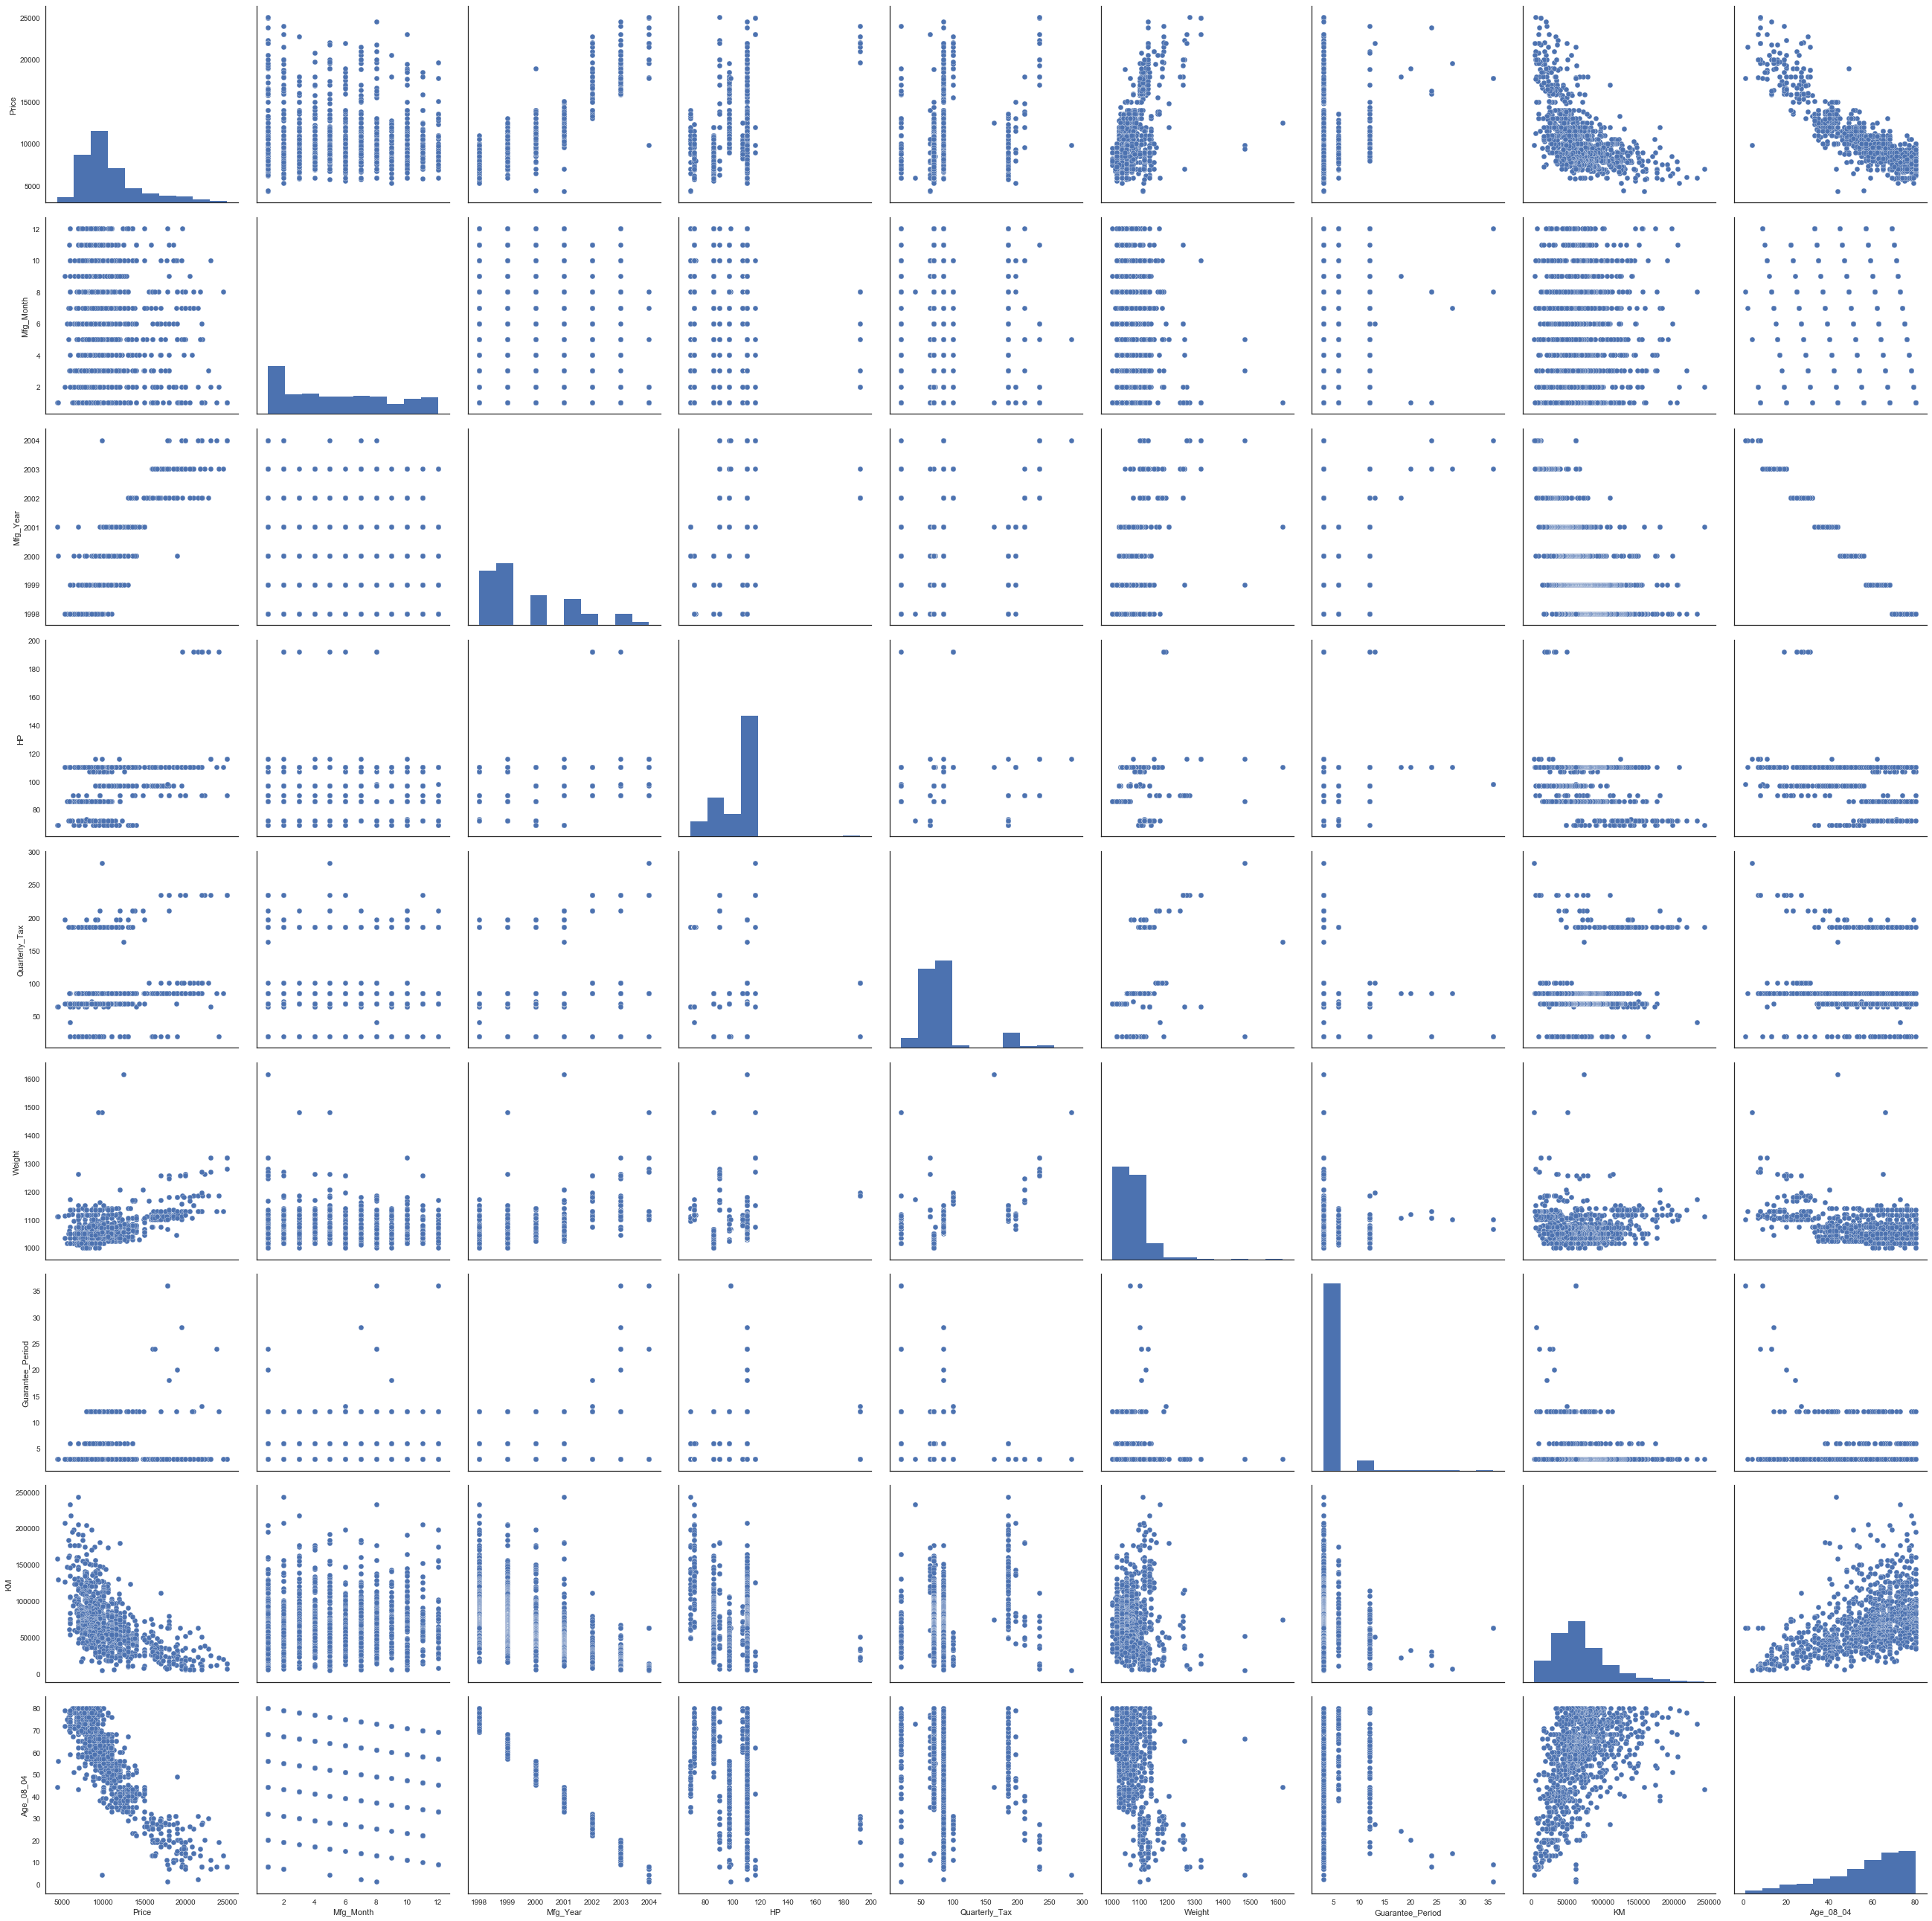

In [34]:
with plt.style.context(('seaborn-white')):
     sns_plot = sns.pairplot(pd.concat([car[['Price']],car[real_list[:]]], axis=1) ,size=4.)
    
plt.show()



#### (1). Price와 양적변수들 간의 correlation analysis

-유의 하지 않으면 제외하기로 합니다.

In [35]:
##### 정규성 가정
var_real

for a in var_real:
    print a,'_shapiro:',stats.shapiro(car[a])

# Guarantee period에는 유의 확률이 0이 나오므로 뭔가 문제가 있어보인다. 



Mfg_Month _shapiro: (0.9377932548522949, 3.2183862493856506e-20)
Mfg_Year _shapiro: (0.8650821447372437, 1.0314542910228092e-28)
HP _shapiro: (0.7076960206031799, 8.874737065425075e-39)
CC _shapiro: (0.7910947799682617, 3.2807170302461736e-34)
Quarterly_Tax _shapiro: (0.6454946994781494, 1.5466131150753006e-41)
Weight _shapiro: (0.7842221260070801, 1.226977674351568e-34)
Guarantee_Period _shapiro: (0.30306458473205566, 0.0)
KM _shapiro: (0.9400759339332581, 7.546534164443782e-20)
Age_08_04 _shapiro: (0.9233288168907166, 2.344096014678657e-22)


In [36]:
#정규성 가정이 깨지거나 자료가 순서형자료, 순위형 자료인 경우
#kendal's correlaation analysis
#stats.kendall's tau
var_real
for b in var_real:
    print b,'_',stats.kendalltau(car['Price'],car[b])

Mfg_Month _ KendalltauResult(correlation=0.00023306668869275645, pvalue=0.99111117559989326)
Mfg_Year _ KendalltauResult(correlation=0.73589967768219022, pvalue=4.5872187065608855e-271)
HP _ KendalltauResult(correlation=0.18200909287890504, pvalue=3.3148159354470085e-18)
CC _ KendalltauResult(correlation=0.090775774486747493, pvalue=1.4304564999892038e-05)
Quarterly_Tax _ KendalltauResult(correlation=0.25489930862897991, pvalue=3.7673048784684112e-34)
Weight _ KendalltauResult(correlation=0.32080971400576314, pvalue=4.4705659264037475e-53)
Guarantee_Period _ KendalltauResult(correlation=0.05734603805945452, pvalue=0.0061220245264023594)
KM _ KendalltauResult(correlation=-0.44814927730927967, pvalue=8.3710862525529252e-102)
Age_08_04 _ KendalltauResult(correlation=-0.67275134282801197, pvalue=6.850272278964108e-227)


Month는 제외했습니다.

### (2). 양적변수들 간의 상관관계 확인(다중공산성 확인)

In [37]:
corre_mat = car_x_real.corr()

corre_mat

,Mfg_Month,Mfg_Year,HP,CC,Quarterly_Tax,Weight,Guarantee_Period,KM,Age_08_04
Mfg_Month,1.000000,-0.079154,-0.032557,0.036403,-0.003706,-0.036109,0.032290,0.003367,-0.098499
Mfg_Year,-0.079154,1.000000,0.170122,0.085745,0.173047,0.471215,0.160928,-0.517981,-0.984218
HP,-0.032557,0.170122,1.000000,0.032090,-0.324570,0.078747,0.090731,-0.350617,-0.164049
CC,0.036403,0.085745,0.032090,1.000000,0.265723,0.295151,-0.016583,0.083882,-0.092059
Quarterly_Tax,-0.003706,0.173047,-0.324570,0.265723,1.000000,0.585494,-0.156661,0.289799,-0.172089
Weight,-0.036109,0.471215,0.078747,0.295151,0.585494,1.000000,0.001592,-0.011154,-0.463990
Guarantee_Period,0.032290,0.160928,0.090731,-0.016583,-0.156661,0.001592,1.000000,-0.136274,-0.166382
KM,0.003367,-0.517981,-0.350617,0.083882,0.289799,-0.011154,-0.136274,1.000000,0.516486
Age_08_04,-0.098499,-0.984218,-0.164049,-0.092059,-0.172089,-0.463990,-0.166382,0.516486,1.000000


상관계수가 큰 MFG_Year이나 Age_08_04 둘중하나는 뺴는 방향으로

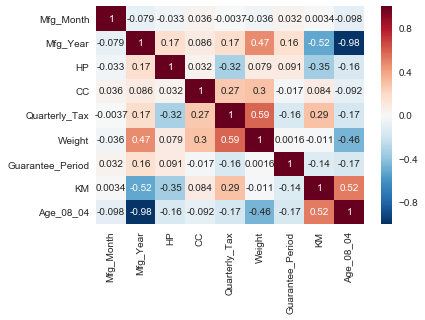

In [38]:
#f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corre_mat, annot=True, fmt='0.2g')

plt.show()



Age_08_04와 Mfg_Year간의 상관분석t-test

In [39]:
stats.kendalltau(car['Age_08_04'],car['Mfg_Year'])

KendalltauResult(correlation=-0.89335622591651065, pvalue=0.0)

## -정리

'Mfg_Month는 제외
'Mfg_Year이나 'Age_08_04' 중 하나는 제외 
 Price와의 유의성을 생각할 경우 'Age_08_04'가 될 가능성이 높음'

#### - 남는 변수 'Mfg_Year',  'HP',  'CC',  'Quarterly_Tax',  'Weight',  'KM',              
#### - 제외 가능성이 높은 변수 ('Age_08_04',Guarantee_Period)

# III. 질적변수 확인

In [40]:

from statsmodels.stats.multicomp import pairwise_tukeyhsd


### (1). Fuel_Type (분산분석)

* 2004년 네덜란드의 diesel 가격은 1,42유로 , gasoline은 1.63유로로 비슷한 모델 간이라면 차량 선택 요소로 작용할 수도 있는 격차가 있다고 생각함. 

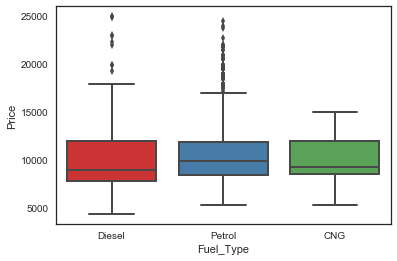

Petrol    904
Diesel    106
CNG         9
Name: Fuel_Type, dtype: int64

In [41]:
display_boxplot('Fuel_Type')
plt.show()

car['Fuel_Type'].value_counts()

In [42]:
car.loc[car["Fuel_Type"] == "Diesel"]
 
shapiro_Diesel = stats.shapiro(car.loc[car['Fuel_Type'] == 'Diesel'].Price)
shapiro_Petrol = stats.shapiro(car.loc[car['Fuel_Type'] == 'Petrol'].Price)
shapiro_CNG = stats.shapiro(car.loc[car['Fuel_Type'] == 'CNG'].Price)

print shapiro_Diesel
print shapiro_Petrol
print shapiro_CNG

(0.821304202079773, 5.362336130687595e-10)
(0.8675471544265747, 5.8636412419206796e-27)
(0.9774238467216492, 0.9497304558753967)


In [43]:
stats.kruskal(car.loc[car['Fuel_Type'] == 'Diesel'].Price,
              car.loc[car['Fuel_Type'] == 'Petrol'].Price,
              car.loc[car['Fuel_Type'] == 'CNG'].Price)

KruskalResult(statistic=3.6080162249863714, pvalue=0.16463767767092377)

유의하지 않다는 결과 (제외 대상)

### (2) Sport_Model, Color

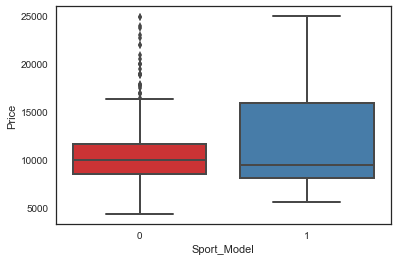

In [44]:
display_boxplot('Sport_Model')
plt.show()

In [45]:
sp = car[car['Sport_Model'] == 0]
sp['Price'].describe()

count      701.000000
mean     10334.034237
std       2879.729393
min       4350.000000
25%       8500.000000
50%       9950.000000
75%      11650.000000
max      24950.000000
Name: Price, dtype: float64

스포츠 모델이 아닐경우에 극단치가 많고 유의하다고 보기 힘들어서 제외하기로

In [46]:
Q3_SP = 11650
Q1_SP = 8500
IQR_2 = Q3_SP - Q1_SP
outlier_standard_max = Q3 + (IQR_2 * 1.5)
outlier_standard_low = Q1 - (IQR_2 * 1.5)
sp[sp['Price'] > outlier_standard_max].count()

Id                   27
Model                27
Price                27
Age_08_04            27
Mfg_Month            27
Mfg_Year             27
KM                   27
Fuel_Type            27
HP                   27
Met_Color            27
Color                27
Automatic            27
CC                   27
Doors                27
Cylinders            27
Gears                27
Quarterly_Tax        27
Weight               27
Mfr_Guarantee        27
BOVAG_Guarantee      27
Guarantee_Period     27
ABS                  27
Airbag_1             27
Airbag_2             27
Airco                27
Automatic_airco      27
Boardcomputer        27
CD_Player            27
Central_Lock         27
Powered_Windows      27
Power_Steering       27
Radio                27
Mistlamps            27
Sport_Model          27
Backseat_Divider     27
Metallic_Rim         27
Radio_cassette       27
Parking_Assistant    27
Tow_Bar              27
dtype: int64

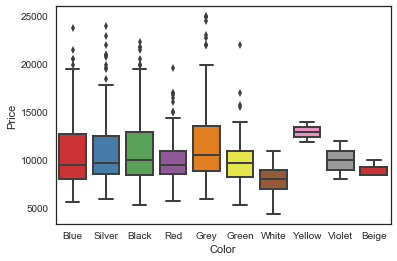

Grey      207
Red       207
Blue      206
Green     149
Black     132
Silver     90
White      21
Beige       3
Violet      2
Yellow      2
Name: Color, dtype: int64

In [47]:
display_boxplot('Color')
plt.show()

car['Color'].value_counts()

유의하다고 생각하는 노란색 변수 갯수가 2개라 Color는 포기 

In [48]:
def display_multi_boxplots(start_feature_name, row, col):
    with plt.style.context(('seaborn-white')):
        f, axes = plt.subplots(row, col, figsize=(2.3*col, 3.5*row), sharey=True)

        nums = row*col
        start_idx = var_cat.index(start_feature_name)

        for num, ax in zip(range(nums), axes.flat):
            try:
                sns.boxplot(x=car[var_cat[start_idx + num]], y=car['Price'], palette="Set3", ax=ax)
            except:
                pass

### (3) 그 외

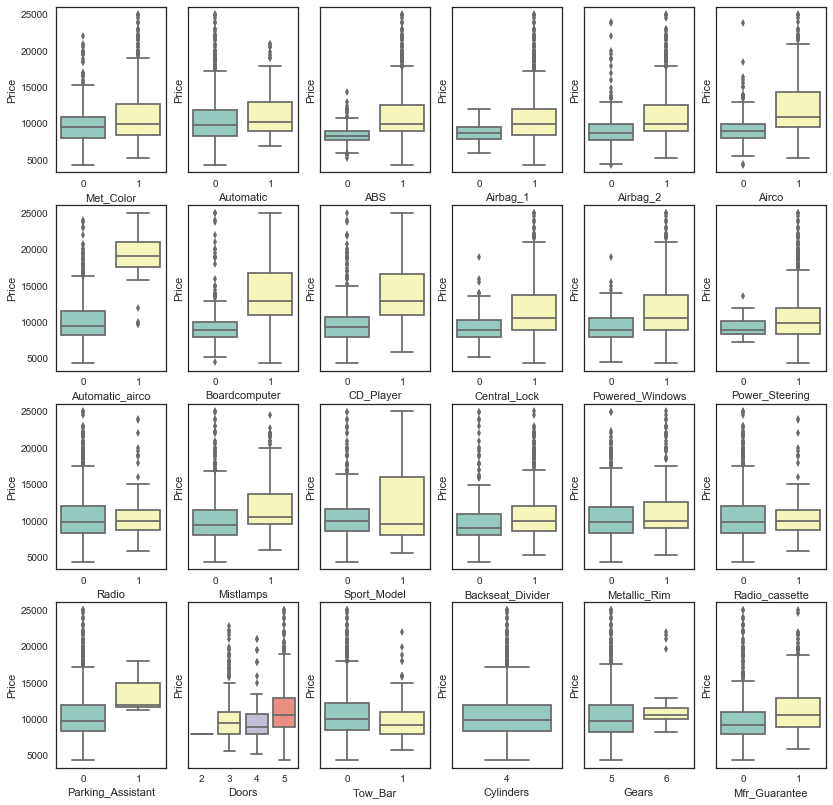

In [49]:
display_multi_boxplots('Met_Color', 4, 6)
plt.show()

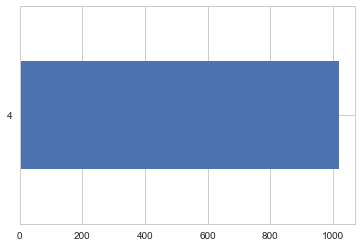

In [50]:
car["Cylinders"].value_counts().plot(kind ="barh")


 Cylinder는 값이 하나이므로 제외

#### (4).Price와 질적변수간에 독립2표본검정(Doors,Gears,Cylinders제외)
* 귀무가설 : 질적자료(유/무)에 따라 가격에 차이가 없다. (mu1 = m2)
* 대립가설 : 질적자료(유/무)에 따라 가격에 차이가 있다. (mu1 != mu2)

In [51]:
var_cat = ['Met_Color', 'Automatic', 'ABS', 'Airbag_1',
          'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
          'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model',
          'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant',
          'Tow_Bar','Mfr_Guarantee','BOVAG_Guarantee']
print '질적자료 개수 = {}'.format(len(var_cat))

# Doors, Gears, Cylinders 제외
i = 0
for var in var_cat:
    statistics1, pvalue1 = stats.shapiro(car.loc[car[var] == 0 ].Price)
    statistics2, pvalue2 = stats.shapiro(car.loc[car[var] == 1 ].Price)
    if pvalue1 > 0.05 and pvalue2 > 0.05:
        print '{} 귀무 '.format(var)
    else:
        print '{} 대립 '.format(var)
    i += 1
print '확인개수 = {}'.format(i)
        

질적자료 개수 = 22
Met_Color 대립 
Automatic 대립 
ABS 대립 
Airbag_1 대립 
Airbag_2 대립 
Airco 대립 
Automatic_airco 대립 
Boardcomputer 대립 
CD_Player 대립 
Central_Lock 대립 
Powered_Windows 대립 
Power_Steering 대립 
Radio 대립 
Mistlamps 대립 
Sport_Model 대립 
Backseat_Divider 대립 
Metallic_Rim 대립 
Radio_cassette 대립 
Parking_Assistant 대립 
Tow_Bar 대립 
Mfr_Guarantee 대립 
BOVAG_Guarantee 대립 
확인개수 = 22


In [52]:
ret = []
for var in var_cat:
    statistics, pvalue = stats.ranksums(car.loc[car[var] == 0 ].Price,
                                        car.loc[car[var] == 1].Price)
    if pvalue < 0.001:
        print '{} 유의'.format(var)
        ret.append(var)
    else:
        print '{} 유의x'.format(var)
        
print
print ret
print len(ret)

Met_Color 유의
Automatic 유의x
ABS 유의
Airbag_1 유의x
Airbag_2 유의
Airco 유의
Automatic_airco 유의
Boardcomputer 유의
CD_Player 유의
Central_Lock 유의
Powered_Windows 유의
Power_Steering 유의x
Radio 유의x
Mistlamps 유의
Sport_Model 유의x
Backseat_Divider 유의
Metallic_Rim 유의x
Radio_cassette 유의x
Parking_Assistant 유의x
Tow_Bar 유의
Mfr_Guarantee 유의
BOVAG_Guarantee 유의x

['Met_Color', 'ABS', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 'Powered_Windows', 'Mistlamps', 'Backseat_Divider', 'Tow_Bar', 'Mfr_Guarantee']
13


In [53]:
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.formula.api as smf

In [54]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
Color = car['Color']
Color_1hot = encoder.fit_transform(Color)
Color_1hot

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [55]:
a = pd.get_dummies(car["Fuel_Type"], drop_first=False)

car_2 = pd.concat([car, a], axis = 1)

del car_2['Fuel_Type']
del car_2['Color']

car_2.head(3)

#pd.merge(a, car)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,...,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar,CNG,Diesel,Petrol
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,90,1,0,...,0,0,1,0,0,0,0,0,1,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,90,1,0,...,0,0,1,0,0,0,0,0,1,0
2,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,90,0,0,...,1,0,1,0,0,0,0,0,1,0


### 결론: 질적변수 15개

'Met_Color', 'ABS', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 'Powered_Windows', 'Mistlamps', 'Backseat_Divider',   'Tow_Bar', 'Mfr_Guarantee'  +'Doors', 'Gears' 

# IV. R로 stepwise both

* AGE_08_04와 MFG_YEAR중 하나 제외하려고 고려중 stepwise에서 AGE_08_04를 제외 시켰으므로 제외시켜줌

In [56]:
import statsmodels.formula.api as smf

In [57]:
car_model_inR = smf.ols('Price ~  Mfg_Month + Mfg_Year + HP + CC + Quarterly_Tax + Weight'
                      '+ Guarantee_Period + KM + Automatic + ABS + Airco + Automatic_airco' 
                    '+ Boardcomputer + CD_Player + Powered_Windows + Sport_Model +' 
                    'Backseat_Divider + Metallic_Rim + Parking_Assistant + Doors +' 
                    'Tow_Bar + Mfr_Guarantee + BOVAG_Guarantee + Diesel+ Petrol ', car_2).fit()

car_model_inR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     320.6
Date:                Fri, 30 Jun 2017   Prob (F-statistic):               0.00
Time:                        13:09:06   Log-Likelihood:                -8654.5
No. Observations:                1019   AIC:                         1.736e+04
Df Residuals:                     993   BIC:                         1.749e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -2.96e+06   1.04e+05    -28.434      0.000   -3.16e+06   -2.76e+06
Mfg_Month            19.2196     11.762      1.634      0.103      -3.862      42.301
Mfg_Year           1482.2922     52.200     28.397      0.000    1379.858    1584.727
HP                   43.3220      6.566      6.598      0.000      30.436      56.208
CC                   -2.0447      0.619     -3.303      0.001      -3.260      -0.830
Quarterly_Tax         6.5057      2.069      3.144      0.002       2.445      10.566
Weight                3.1239      1.370      2.279      0.023       0.435       5.813
Guarantee_Period     80.4252     15.843      5.076      0.000      49.335     111.515
KM                   -0.0153      0.001    -10.472      0.000      -0.018      -0.012
Automatic           662.5692    172.109      3.850      0.000     324.830    1000.309
ABS                -445.7112    114.516     -3.892      0.000    -670.432    -220.991
Airco               285.8741     98.970      2.888      0.004      91.659     480.089
Automatic_airco    2199.5887    197.267     11.150      0.000    1812.480    2586.697
Boardcomputer      -232.2956    133.451     -1.741      0.082    -494.175      29.584
CD_Player           195.7355    110.516      1.771      0.077     -21.135     412.606
Powered_Windows     442.4864     94.945      4.660      0.000     256.170     628.803
Sport_Model         452.3722     96.041      4.710      0.000     263.906     640.838
Backseat_Divider   -136.3908    133.995     -1.018      0.309    -399.336     126.554
Metallic_Rim        200.7699    104.013      1.930      0.054      -3.340     404.880
Parking_Assistant  -845.6433    707.512     -1.195      0.232   -2234.034     542.747
Doors               164.2615     44.502      3.691      0.000      76.933     251.590
Tow_Bar            -151.7584     87.709     -1.730      0.084    -323.874      20.358
Mfr_Guarantee       237.6510     83.150      2.858      0.004      74.481     400.821
BOVAG_Guarantee     440.3033    138.513      3.179      0.002     168.492     712.115
Diesel             2565.7447    614.390      4.176      0.000    1360.093    3771.396
Petrol              833.0313    469.414      1.775      0.076     -88.126    1754.188
==============================================================================
Omnibus:                      555.652   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30338.282
Skew:                          -1.733   Prob(JB):                         0.00
Kurtosis:                      29.505   Cond. No.                     2.17e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The cond

### (1) 질적변수에서 독립 2표본 검정으로 유의하지 않다고 나온 것 제외

In [58]:
car_model_inR2 = smf.ols('Price ~  Mfg_Year + HP + CC + Quarterly_Tax + Weight'
                      '+ Guarantee_Period + KM + Automatic + ABS + Airco + Automatic_airco' 
                    '+ Boardcomputer + CD_Player + Powered_Windows +' 
                    'Backseat_Divider + Doors +' 
                    'Tow_Bar + Mfr_Guarantee + Diesel+ Petrol', car_2).fit()

car_model_inR2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     384.3
Date:                Fri, 30 Jun 2017   Prob (F-statistic):               0.00
Time:                        13:09:06   Log-Likelihood:                -8675.6
No. Observations:                1019   AIC:                         1.739e+04
Df Residuals:                     998   BIC:                         1.750e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -2.928e+06   1.04e+05    -28.175      0.000   -3.13e+06   -2.72e+06
Mfg_Year          1465.6372     52.114     28.124      0.000    1363.372    1567.903
HP                  42.0986      6.608      6.371      0.000      29.131      55.066
CC                  -2.0354      0.629     -3.237      0.001      -3.269      -0.802
Quarterly_Tax        6.9456      2.102      3.304      0.001       2.821      11.071
Weight               4.0289      1.363      2.956      0.003       1.355       6.703
Guarantee_Period    79.0923     16.005      4.942      0.000      47.686     110.499
KM                  -0.0147      0.001     -9.944      0.000      -0.018      -0.012
Automatic          606.8278    172.787      3.512      0.000     267.760     945.896
ABS               -276.1015    112.882     -2.446      0.015    -497.615     -54.589
Airco              276.7881     99.320      2.787      0.005      81.887     471.689
Automatic_airco   2442.0240    195.426     12.496      0.000    2058.531    2825.517
Boardcomputer     -317.9759    132.989     -2.391      0.017    -578.947     -57.005
CD_Player          219.3536    112.306      1.953      0.051      -1.029     439.736
Powered_Windows    459.6560     94.687      4.854      0.000     273.848     645.464
Backseat_Divider   174.3469    125.715      1.387      0.166     -72.349     421.043
Doors              124.4663     44.445      2.800      0.005      37.251     211.682
Tow_Bar           -179.7717     88.938     -2.021      0.044    -354.298      -5.246
Mfr_Guarantee      269.7518     83.623      3.226      0.001     105.656     433.848
Diesel            2611.5422    624.214      4.184      0.000    1386.619    3836.466
Petrol            1085.3130    475.294      2.283      0.023     152.624    2018.002
==============================================================================
Omnibus:                      514.563   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24820.877
Skew:                          -1.568   Prob(JB):                         0.00
Kurtosis:                      26.974   Cond. No.                     2.13e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### (2). * 회귀 변수 결과 값에서 유의하지 않은 변수 제외 
* 제외할 때 마다 지속적으로 유의하지 않은 변수가 등장하므로             유의하지 않은 변수가 나올 때 까지 시도

In [59]:
car_model_inR3 = smf.ols('Price ~  Mfg_Year + HP + CC + Weight + Quarterly_Tax'
                       '+ Automatic_airco' '+ Powered_Windows + Mfr_Guarantee', car_2).fit()

car_model_inR3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     793.3
Date:                Fri, 30 Jun 2017   Prob (F-statistic):               0.00
Time:                        13:09:06   Log-Likelihood:                -8766.3
No. Observations:                1019   AIC:                         1.755e+04
Df Residuals:                    1010   BIC:                         1.759e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -3.282e+06   6.76e+04    -48.547      0.000   -3.41e+06   -3.15e+06
Mfg_Year         1641.5090     34.014     48.259      0.000    1574.762    1708.256
HP                 33.1148      3.483      9.508      0.000      26.280      39.950
CC                 -1.3438      0.356     -3.775      0.000      -2.042      -0.645
Weight              7.4793      1.306      5.725      0.000       4.916      10.043
Quarterly_Tax       4.3178      1.766      2.445      0.015       0.852       7.783
Automatic_airco  2479.6148    207.673     11.940      0.000    2072.095    2887.134
Powered_Windows   506.9322     90.722      5.588      0.000     328.906     684.958
Mfr_Guarantee     301.9550     86.935      3.473      0.001     131.362     472.548
==============================================================================
Omnibus:                      395.699   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10151.513
Skew:                          -1.197   Prob(JB):                         0.00
Kurtosis:                      18.276   Cond. No.                     4.50e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# V. 머신러닝

In [60]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

### (1). scaling

In [61]:
Price_mean = car_2.Price.mean()
Price_std = car_2.Price.std()

MY_mean = car_2.Mfg_Year.mean()
MY_std = car_2.Mfg_Year.std()

HP_mean = car_2.HP.mean()
HP_std = car_2.HP.std()

CC_mean = car_2.CC.mean()
CC_std = car_2.CC.std()

QT_mean = car_2.Quarterly_Tax.mean()
QT_std = car_2.Quarterly_Tax.std()

Weight_mean = car_2.Weight.mean()
Weight_std = car_2.Weight.std()

GP_mean = car_2.Guarantee_Period.mean()
GP_std = car_2.Guarantee_Period.std()

KM_mean = car_2.KM.mean()
KM_std = car_2.KM.std()


processed_data = (car_2
                  .assign(Price_standard = lambda x: (x.Price - Price_mean)/Price_std)
                  .assign(MY_standard = lambda x: (x.Mfg_Year - MY_mean)/MY_std)
                  .assign(HP_standard = lambda x: (x.HP - HP_mean)/HP_std)
                  .assign(CC_standard = lambda x: (x.CC - CC_mean)/CC_std)
                  .assign(QT_standard = lambda x: (x.Quarterly_Tax - QT_mean)/QT_std)
                  .assign(Weight_standard = lambda x: (x.Weight - Weight_mean)/Weight_std)
                  .assign(GP_standard = lambda x: (x.Guarantee_Period - GP_mean)/GP_std)
                  .assign(KM_standard = lambda x: (x.KM - KM_mean)/KM_std)
                 )


processed_data.head(3)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,...,Diesel,Petrol,Price_standard,MY_standard,HP_standard,CC_standard,QT_standard,Weight_standard,GP_standard,KM_standard
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,90,1,0,...,1,0,0.781831,1.534843,-0.775074,2.348855,3.146802,1.805758,-0.277051,-0.570752
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,90,1,0,...,1,0,0.852079,1.534843,-0.775074,2.348855,3.146802,1.805758,-0.277051,0.118239
2,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,90,0,0,...,1,0,0.852079,1.534843,-0.775074,2.348855,3.146802,1.903116,-0.277051,-0.796053


### (2). train set 설정

In [62]:
tr, validation = train_test_split(processed_data.iloc[:, 2:], test_size=0.25)
#print tr.shape, test.shape
#tr, validation = train_test_split(tr, test_size=0.25)
#tr_0, tr_2 = train_test_split(tr_0, test_size=0.25) 
#tr_0, tr_3 = train_test_split(tr_0, test_size=0.33) 
#tr_0, tr_4 = train_test_split(tr_0, test_size=0.5)
# print tr_0.shape, tr_1.shape, tr_2.shape, tr_3.shape, tr_4.shape

#tr = pd.DataFrame()
#tr = tr_1.append(tr_2)
#tr = tr.append(tr_3)
#tr = tr.append(tr_4)
print len(tr), len(validation)

764 255


### (3) 우리가 고른 변수
- Mfg_Year, HP, CC, Quarterly_Tax, Weight, Guarantee_Period, KM
- ABS, Airco, Automatic_airco, Powered_Windows
- Sport_Model, Mfr_Guarantee, Diesel, Petrol

In [63]:
attributes = ['MY_standard', 'HP_standard', 'CC_standard', 'QT_standard', 'Weight_standard', 'GP_standard', 'KM_standard',
              'ABS', 'Airco', 'Automatic_airco', 'Powered_Windows', 'Sport_Model', 'Mfr_Guarantee', 'Diesel', 'Petrol']
len(attributes)

15

In [64]:
price_target = tr['Price_standard'].copy() # 예측 가격.
#price_target
print price_target.shape
print price_target.head(3)

(764,)
978   -0.552881
400    0.219847
607   -0.707426
Name: Price_standard, dtype: float64


#### 경사하강법

In [65]:
def kyungsahagang(attributes):
    
    y = price_target
    
    x = {}
    x[0] = 1
    a = 1
    for attr in attributes: # attributes는 우리가 고른 변수 들어있는 곳이고, 이 과정은 x[1] ~ x[15]에 변수 담는 과정
        x[a] = tr[attr]
        a += 1
    
    theta = np.zeros(len(attributes)+1)
    
    n = len(x[1]) # n은 데이터의 개수
    alpha = 0.1

    costs = []
    iterations = []
    gradient = {}

    for i in range(100): # 100번 반복
        
        y_hat = np.zeros(len(tr))
        for j in range(len(attributes)+1): # y_hat 식 구성.
            y_hat = y_hat + theta[j]*x[j]

        residual = y_hat - y
        cost = (residual ** 2).sum()/(2*n)

        for k in range(16):
            gradient[k] = 1.0/n * (residual*x[k]).sum()
            theta[k] -= alpha * gradient[k]

        iterations.append(i+1)
        costs.append(cost)
         
    print 'cost = {:.3f}  iterations = {}\n'.format(cost, iterations[-1])
    
    plt.plot(iterations, costs)
        
    for b in range(len(attributes)+1):
        print 'theta{} = {:.3f}'.format(b, theta[b])
    print type(theta)    
    print
    for m in range(len(attributes)+1):
        print 'gradient{} = {:.3f}'.format(m, gradient[m])
    print type(gradient)
    
    

cost = 0.068  iterations = 100

theta0 = -0.078
theta1 = 0.648
theta2 = 0.122
theta3 = -0.011
theta4 = 0.056
theta5 = 0.110
theta6 = 0.060
theta7 = -0.181
theta8 = -0.073
theta9 = 0.101
theta10 = 0.274
theta11 = 0.119
theta12 = 0.148
theta13 = 0.049
theta14 = 0.007
theta15 = -0.059
<type 'numpy.ndarray'>

gradient0 = -0.001
gradient1 = -0.003
gradient2 = -0.000
gradient3 = -0.001
gradient4 = -0.000
gradient5 = 0.005
gradient6 = -0.000
gradient7 = -0.003
gradient8 = 0.006
gradient9 = 0.001
gradient10 = -0.016
gradient11 = -0.003
gradient12 = -0.004
gradient13 = -0.001
gradient14 = -0.003
gradient15 = -0.001
<type 'dict'>


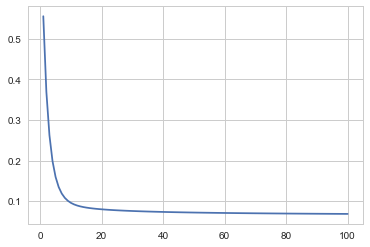

In [66]:
kyungsahagang(attributes)

In [67]:
tr.head(1)

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,CC,Doors,...,Diesel,Petrol,Price_standard,MY_standard,HP_standard,CC_standard,QT_standard,Weight_standard,GP_standard,KM_standard
978,8750,73,8,1998,56307,110,1,0,1600,3,...,0,1,-0.552881,-1.048154,0.575243,0.186745,-0.44315,-0.433477,-0.277051,-0.323282


In [68]:
attributes = ['Mfg_Year', 'HP',  'CC',  'Weight', 'Quarterly_Tax','Automatic_airco','Powered_Windows','Mfr_Guarantee']
#attributes = ['MY_standard', 'HP_standard', 'CC_standard', 'Weight_standard', 'KM_standard',
#               'Automatic_airco', 'Powered_Windows', 'Mfr_Guarantee']

##### 변수 설정에 따른 모델 생성 함수

In [69]:
def samoyed(attributes):
    model_0 = linear_model.LinearRegression()
    model_0.fit(tr[attributes], price_target)
    return model_0

##### 모델 평가 함수

In [70]:
def evaluation_model(model_0):
    print 'model evalutaion'
    print
    #print 'R^2'
    print cross_val_score(model_0, tr[attributes], price_target, cv=5 )
    print
    
    price_predictions = model_0.predict(validation[attributes])
 
    mse = mean_squared_error(price_predictions, validation.Price_standard)
    rmse = np.sqrt(mse)
    print 'rmse = {}\n'.format(rmse)

    #print type(model_0)
    print 'coef'
    print '{}\n'.format(model_0.coef_)
    print 'intercept'
    print '{:.3f}\n'.format(model_0.intercept_)

    print '='*100
    

In [71]:
model_0 = samoyed(attributes)

In [72]:
evaluation_model(model_0)

model evalutaion

[ 0.87984509  0.87516339  0.87791804  0.75677132  0.84966769]

rmse = 0.317201669044

coef
[  4.75664233e-01   9.73656349e-03  -2.56978586e-04   1.53896099e-03
   1.44759047e-03   7.17895521e-01   1.47603799e-01   6.59592358e-02]

intercept
-953.650



In [73]:
samoyed(attributes)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [74]:
car_model_inR3 = smf.ols('Price ~ Mfg_Year + HP + CC + Weight + Quarterly_Tax'
                       '+ Automatic_airco' '+ Powered_Windows + Mfr_Guarantee'  
                         , car_2).fit()

car_model_inR3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     793.3
Date:                Fri, 30 Jun 2017   Prob (F-statistic):               0.00
Time:                        13:09:08   Log-Likelihood:                -8766.3
No. Observations:                1019   AIC:                         1.755e+04
Df Residuals:                    1010   BIC:                         1.759e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -3.282e+06   6.76e+04    -48.547      0.000   -3.41e+06   -3.15e+06
Mfg_Year         1641.5090     34.014     48.259      0.000    1574.762    1708.256
HP                 33.1148      3.483      9.508      0.000      26.280      39.950
CC                 -1.3438      0.356     -3.775      0.000      -2.042      -0.645
Weight              7.4793      1.306      5.725      0.000       4.916      10.043
Quarterly_Tax       4.3178      1.766      2.445      0.015       0.852       7.783
Automatic_airco  2479.6148    207.673     11.940      0.000    2072.095    2887.134
Powered_Windows   506.9322     90.722      5.588      0.000     328.906     684.958
Mfr_Guarantee     301.9550     86.935      3.473      0.001     131.362     472.548
==============================================================================
Omnibus:                      395.699   Durbin-Watson:                   1.696
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10151.513
Skew:                          -1.197   Prob(JB):                         0.00
Kurtosis:                      18.276   Cond. No.                     4.50e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
car_model_inR4 = smf.ols('Price ~  Mfg_Year + HP + Weight + KM + Automatic_airco + Powered_Windows + Mfr_Guarantee', car_2).fit()
car_model_inR4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1006.
Date:                Fri, 30 Jun 2017   Prob (F-statistic):               0.00
Time:                        13:09:08   Log-Likelihood:                -8720.8
No. Observations:                1019   AIC:                         1.746e+04
Df Residuals:                    1011   BIC:                         1.750e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -2.939e+06   7.35e+04    -39.997      0.000   -3.08e+06    -2.8e+06
Mfg_Year         1469.5364     36.937     39.785      0.000    1397.054    1542.019
HP                 18.7836      3.013      6.233      0.000      12.870      24.697
Weight              9.2754      0.960      9.662      0.000       7.392      11.159
KM                 -0.0144      0.001    -10.501      0.000      -0.017      -0.012
Automatic_airco  2336.2013    197.824     11.809      0.000    1948.008    2724.394
Powered_Windows   552.5408     86.759      6.369      0.000     382.293     722.788
Mfr_Guarantee     236.5571     83.207      2.843      0.005      73.279     399.835
==============================================================================
Omnibus:                      460.798   Durbin-Watson:                   1.784
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16384.565
Skew:                          -1.402   Prob(JB):                         0.00
Kurtosis:                      22.443   Cond. No.                     1.45e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Test

#### TEST data set 불러오기

In [76]:
test = pd.read_csv("test.csv")
test = pd.DataFrame(test)
test.head(3)

,Id,Model,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,3,��TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,24,9,2002,41711,Diesel,90,1,Blue,...,0,1,0,0,0,1,0,0,0,0
1,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,26,7,2002,48000,Diesel,90,0,Black,...,0,1,0,0,0,1,0,0,0,0
2,6,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,32,1,2002,61000,Diesel,90,0,White,...,1,1,0,1,0,1,0,0,0,0


#### TEST data set 불러오기

In [77]:
test = pd.read_csv("test.csv")
test = pd.DataFrame(test)
test.head(3)

,Id,Model,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
0,3,��TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,24,9,2002,41711,Diesel,90,1,Blue,...,0,1,0,0,0,1,0,0,0,0
1,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,26,7,2002,48000,Diesel,90,0,Black,...,0,1,0,0,0,1,0,0,0,0
2,6,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,32,1,2002,61000,Diesel,90,0,White,...,1,1,0,1,0,1,0,0,0,0


#### TEST data set 전처리

In [78]:
processed_test_data = (test
                       .assign(MY_standard = lambda x: (x.Mfg_Year - MY_mean)/MY_std)
                       .assign(HP_standard = lambda x: (x.HP - HP_mean)/HP_std)
                       .assign(CC_standard = lambda x: (x.CC - CC_mean)/CC_std)
                       .assign(QT_standard = lambda x: (x.Quarterly_Tax - QT_mean)/QT_std)
                       .assign(Weight_standard = lambda x: (x.Weight - Weight_mean)/Weight_std)
                      )

##### TEST 함수

In [79]:
def test(model_0):

    price_predictions = model_0.predict(processed_test_data[attributes])
    
    # Price_standard = lambda x: (x.Price - Price_mean)/Price_std)
    
    result = (price_predictions * Price_std) + Price_mean
    
    return result

In [80]:
result = test(model_0)



##### 결과물 result

In [81]:
result

array([ 14828.84563393,  14828.84563393,  15146.78841599,  15557.55486835,
        15792.29195428,  18379.53083678,  13500.49225125,  21169.12927782,
        21169.12927782,  17201.42913855,  18077.40813136,  18077.40813136,
        15145.45831847,  14910.72123254,  14620.16288063,  15970.7019692 ,
        18372.97952885,  21223.89813814,  15970.7019692 ,  14965.49009285,
        14965.49009285,  19328.11469585,  14926.38287721,  14440.19465502,
        18132.17699168,  15200.22717878,  15495.16234609,  14440.19465502,
        20966.14949793,  20015.58703433,  15839.52929954,  16838.26198086,
        24296.82177633,  24296.82177633,  21020.91835824,  16953.22892256,
        19824.98065407,  19590.24356814,  17051.0438577 ,  16893.03084118,
        17187.96600849,  16756.10869039,  17187.96600849,  19688.05850329,
        16394.14030615,  18351.09741764,  18646.03258495,  21517.78431647,
        18086.94396854,  18351.09741764,  18585.83450357,  18086.94396854,
        13449.53474776,  

결론: 더 많은 프로젝트를 해보면서 각 상충되는 지표간에 어느정도의 최적화 또는 일반화가 적정수준 인지 많이 해보면서 감을 익히는 것이 중요할 듯 하다.
결국 Data Science보다는 Data Art에 가깝다.

In [82]:
   #price_predictions
    #x.Price - Price_mean)/Price_std
    #for price in price_predictions:
    #    price = (price*Price_std) + Price_mean
    #    print price
    #Price_std
    #model_0 = theta + theta*x1 + theta*x2
    #len(price_predictions)

In [83]:
#tr

In [84]:
xx = np.linspace(-3, 3)
#y_hat = theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3 + theta_4 * x4 + theta_5 * x5 + theta_6 * x6 + theta_7 * x7 +\
#theta_8 * x8 + theta_9 * x9 + theta_10 * x10 + theta_11 * x11 + theta_12 * x12 + theta_13 * x13 +\
#theta_14 * x14 + theta_15 * x15
#tr[attributes]
#print type(y_hat)
#print type(tr[attributes])
#print type(tr.Price_standard)
#tr[attributes]
#print type(tr[attributes][:, ])
#print tr[attributes].shape, tr.Price_standard.shape

price_predictions = model_0.predict(tr[attributes])

In [85]:
price_predictions = model_0.predict(validation[attributes])
#price_predictions
#x.Price - Price_mean)/Price_std
#for price in price_predictions:
#    price = (price*Price_std) + Price_mean
#    print price
#Price_std
#model_0 = theta + theta*x1 + theta*x2
#len(price_predictions)

mse = mean_squared_error(price_predictions, validation.Price_standard)
rmse = np.sqrt(mse)
rmse

0.31720166904420277

In [86]:
#plt.scatter(x=tr.Price_standard , y=y_hat_0) # x축 : train 셋의 Price , y축 : 예측한 Price 값.

#print x.shape, y_hat_0.shape

In [87]:
tr['MY_standard'].head()

978   -1.048154
400    0.243344
607   -0.402405
816   -1.048154
151    0.889093
Name: MY_standard, dtype: float64

In [88]:
tr['Price_standard'].shape

(764,)